In [2]:
import librosa
import glob
import random

from librosa import display

import scipy as sp
import numpy as np

import matplotlib.pyplot as plt

import IPython.display as ipd

In [3]:
file_list = sorted(glob.glob('../resource/*.wav'))

In [4]:
file = random.choice(file_list)

print(file)

../resource/28. HIP (O-B).wav


In [5]:
sec = 5

fs = librosa.get_samplerate(file)

print('Sampling Rate: {}'.format(fs))

stream = librosa.core.stream(file, 1, sec * fs, sec * fs, mono=False)

# next(stream)

Sampling Rate: 16000


In [6]:
def spec2mel(img):
    return 20 * np.log(np.maximum(img, 1e-8))

In [7]:
# data = next(stream)

# T, F, Sxx = sp.signal.stft(data, fs=16000, nperseg=400)

# Zxx = np.abs(Sxx)

# plt.figure()
# plt.imshow(spec2mel(Zxx[0]), origin='reversed', aspect='auto')
# plt.show()

# plt.figure()
# plt.imshow(spec2mel(Zxx[1]), origin='reversed', aspect='auto')
# plt.show()

# print(Sxx.shape)

In [8]:
data = next(stream)

In [9]:
ipd.Audio(data, rate=16000)

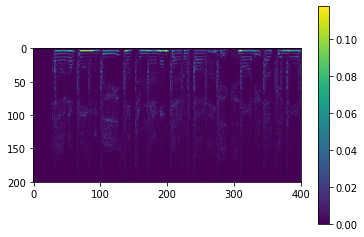

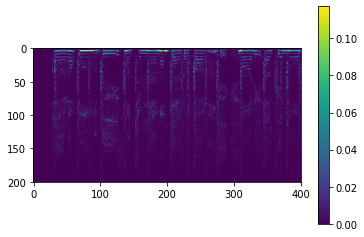

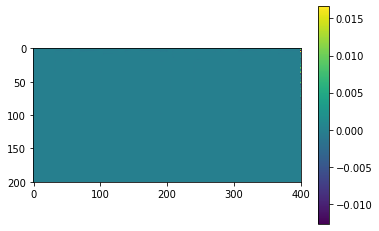

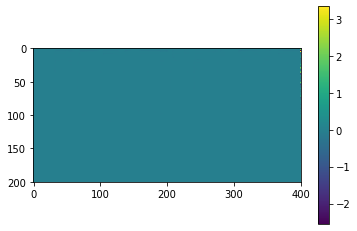

In [21]:
# data = next(stream)

y1 = np.copy(data[0, :])
y2 = np.copy(data[1, :])

T, F, Sxx = sp.signal.stft(data, fs=16000, nperseg=400)

Zxx_scipy = np.abs(Sxx)

Zxx_librosa = np.abs(librosa.stft(y1, n_fft=400, hop_length=200, win_length=400))

plt.figure()
plt.imshow(Zxx_scipy[0, :, :])
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(Zxx_librosa/Zxx_librosa.shape[0])
plt.colorbar()
plt.show()


plt.figure()
plt.imshow(Zxx_librosa/Zxx_librosa.shape[0] - Zxx_scipy[0, :, :])
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(Zxx_librosa - Zxx_scipy[0, :, :] * Zxx_scipy.shape[1])
plt.colorbar()
plt.show()